    ML – TASK by ALEBRO Technologies S.r.l.

Author: Faisal Ramzan (faisal.ramzan@studio.unibo.it).

Primary gmail: faisalramzan.unibo@gmail.com

Contact: 0039 388 140 7271


####About Task:

**About Dataset:**

1. Using the **“surv.csv”** dataset, develop a model that predicts which passengers will survive, using a **Random Forest algorithm**.

**Dataset description:**

The given dataset contains 890 rows, each row is a person who boarded the Titanic
For each person we have:

a. A Passenger ID that uniquely identifies the passenger.

b. A 'Survived' column, with entries 1/0, indicating whether the passenger survived the disaster.

c. A 'Pclass' column, which indicates in which class the passenger was staying: 'P' is the first class, 'S' the second class and 'T' the third class.

d. 'Sex' is the column indicating the passenger's gender.

e. 'Age' indicates the age of the passenger.

f. 'Fare' is the cost of the ticket.


2. How do you check the validity of the model found? **(Answer in report)**

3. As new step, can you accept that the algorithm does not identify all the person who have
been saved, but want to have much more certainty that the person identified by the
algorithm have really been saved? **(Answer in report)**

In [167]:
#Importing Libraries
import numpy as np 
import pandas as pd
import seaborn as sns # data visualization
%matplotlib inline
import sklearn
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split #train_test_split
from sklearn.ensemble import RandomForestClassifier #algo
from sklearn.metrics import accuracy_score #evaluation methods 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV

In [168]:
#reading & upoading the dataset files from local PC
from google.colab import files
uploaded = files.upload()

Saving surv.csv to surv (3).csv


In [169]:
dt=pd.read_csv("surv.csv")

###Data Analysis:

In [170]:
#data inspection
dt.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,T,male,22.0,7.2500
1,2,1,P,female,38.0,71.2833
2,3,1,T,female,26.0,7.9250
3,4,1,P,female,35.0,53.1000
4,5,0,T,male,35.0,8.0500
5,6,0,T,male,NaN,8.4583
6,7,0,P,male,54.0,51.8625
7,8,0,T,male,2.0,21.0750
8,9,1,T,female,27.0,11.1333
9,10,1,S,female,14.0,30.0708


In [171]:
#Show columns of the given dataset
dt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [172]:
#Showing the types of the columns
print(dt.dtypes)

PassengerId      int64
Survived         int64
Pclass          object
Sex             object
Age            float64
Fare           float64
dtype: object


In [173]:
#checking the quality of given dataset
dt.describe()

,PassengerId,Survived,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,29.699118,32.204208
std,257.353842,0.486592,14.526497,49.693429
min,1.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,20.125000,7.910400
50%,446.000000,0.000000,28.000000,14.454200
75%,668.500000,1.000000,38.000000,31.000000
max,891.000000,1.000000,80.000000,512.329200


In [174]:
#demonastrate the quality of single feature 
dt['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [175]:
#checking the ground truth classes distributions
dt["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

###Data Cleaning and Preprocessing: 

In [176]:
#checking the null entries from the given dataset
dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
dtype: int64

In [177]:
#Replacing the missing values in the “Age” column with the mean value
dt['Age'].fillna(dt['Age'].mean(), inplace=True)
dt.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
dtype: int64

In [178]:
#showing the complete information about data
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB



During feature preparation phase, we are dealing with numerical data not with Categoircal to perform classification task, so we need to use such transformation method that transform the orginal categorical(Type: OBJECT) nature of data into numerical (Float).
We cast the datatype explicitly and then transform into such form that is feed into the model for making prediction.

In [179]:
#making numerical class problem (0,1,2)
dt.replace({'Sex':{'male':0,'female':1}, 'Pclass':{'T':0.0,'P':1.0,'S':2.0}}, inplace=True)
dt.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,0.0,0,22.000000,7.2500
1,2,1,1.0,1,38.000000,71.2833
2,3,1,0.0,1,26.000000,7.9250
3,4,1,1.0,1,35.000000,53.1000
4,5,0,0.0,0,35.000000,8.0500
5,6,0,0.0,0,29.699118,8.4583
6,7,0,1.0,0,54.000000,51.8625
7,8,0,0.0,0,2.000000,21.0750
8,9,1,0.0,1,27.000000,11.1333
9,10,1,2.0,1,14.000000,30.0708


In [180]:
#after transformatio
print(dt.dtypes)

PassengerId      int64
Survived         int64
Pclass         float64
Sex              int64
Age            float64
Fare           float64
dtype: object


In [181]:
#for checking the values
dt.Pclass.unique()

array([0., 1., 2.])

###data Exploration and Visualization

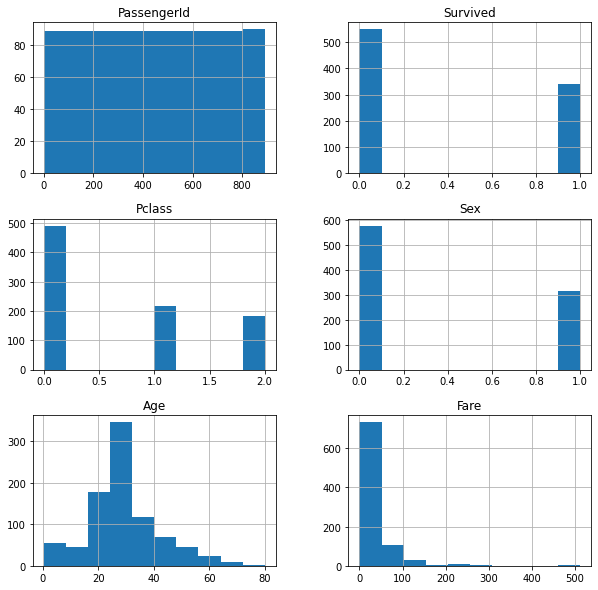

In [182]:
#using pandas histrogram to determine thedistribution of data
pd.DataFrame.hist(dt
                  , figsize = [10,10]
                 );

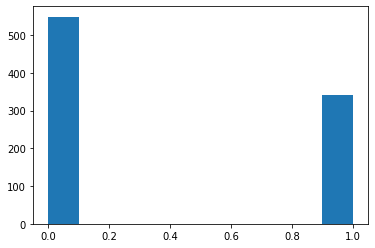

In [183]:
#Plot an histogram for Traget Feature "Survived"
plt.hist(dt['Survived'])
plt.show()

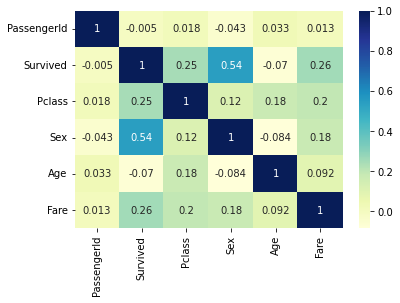

In [184]:
#its show the correlation between different features
corr = dt[dt.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

### Preparing features and target


In [185]:
# to prepare samples for target (Y) and features (X)
X = dt.drop(columns = ['PassengerId','Survived'],axis=1)
X.columns

Index(['Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [186]:
#featured used for making predictions
X.head()

,Pclass,Sex,Age,Fare
0,0.0,0,22.0,7.2500
1,1.0,1,38.0,71.2833
2,0.0,1,26.0,7.9250
3,1.0,1,35.0,53.1000
4,0.0,0,35.0,8.0500


In [187]:
#target values or ground truth
Y = dt['Survived']
labels = Y.unique()
labels

array([0, 1])

In [188]:
#checking shape of both target and feature attributes
X.shape, Y.shape

((891, 4), (891,))

###Train - Test Split
In order to measure the performance Classification task, we need to split our dataset into two parts i-e train and test test with standard ratio of 80:20.
Random state ensures that if I have to rerun my code, I’ll get the exact same train-test split.so my results won’t change. For imbalance classes stratify=Y, that use same ratio of train and test set but not in good system.

In [189]:
#train-test split (Test size:20%), random_state (select random or shuffels) 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [190]:
#sample use for training purpose
Y_train.value_counts()

0    443
1    269
Name: Survived, dtype: int64

In [191]:
#sum of all samples for training purpose
Y_train.value_counts().sum()

712

In [192]:
#sample use for testing purpose
Y_test.value_counts()

0    106
1     73
Name: Survived, dtype: int64

In [193]:
#sum of all samples for testing  purpose
Y_test.value_counts().sum()

179

In [194]:
#total sample used for training and testing
Y_train.value_counts().sum() + Y_test.value_counts().sum()

891

###Classification Model

In [195]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8707865168539326


In [196]:
#In this problem our dataset classes are unbalance, so for unbalance classes we use to measure F1 score to check the quality of system
training_data_f1_score = f1_score(Y_train, X_train_prediction)
print('F1 score of training data : ', training_data_f1_score)

F1 score of training data :  0.8083333333333333


Prediction on Test dataset

In [197]:
model.fit(X_test, Y_test)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8994413407821229


In [198]:
#F1 score
test_data_f1_score = f1_score(Y_test, X_test_prediction)
print('F1 score of test data : ', test_data_f1_score)

F1 score of test data :  0.8656716417910448


### Parameter tunning using cross validation techniques

In [199]:
model_lbls = ['rfc']

# Set the parameters by cross-validation
tuned_param_rfc =[{'max_depth': list(range(1,11))}]
#tuned_param_rfc_n =[{'n_estimators': list(range(1,20))}]
models = { 
    'rfc':{'name': 'Random Forest       ',
           'estimator': RandomForestClassifier(),
           'param': tuned_param_rfc #tuned_param_rfc_n
          }
}
scores = [
#    'precision_macro', 
#    'recall_macro', 
#    'accuracy',
     'f1'
]

In [200]:
def print_results(model):
    print("Best parameters set found on train set:")
    print()
    # if best is linear there is no gamma parameter
    print(model.best_params_)
    print()
    print("Grid scores on train set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    params = model.cv_results_['params']
    for mean, std, params_tuple in zip(means, stds, params):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params_tuple))
    print()
    print("Detailed classification report for the best parameter set:")
    print()
    print("The model is trained on the full train set.")
    print("The scores are computed on the full test set.")
    print()
    y_true, y_pred = Y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true,y_pred, labels = labels)
    print(cm)
#     plot_confusion_matrix(cm)
    print()

Through these function we get the optimized parameter for max-depth of tree and then use it for making prediction on Test data that enhance the perfomace of the model.

In [201]:
results_short = {}

for score in scores:
    print('='*40)
    print("# Tuning hyper-parameters for %s" % score)
    print()

    #'%s_macro' % score ## is a string formatting expression
    # the parameter after % is substituted in the string placeholder %s
    for m in model_lbls:
        print('-'*40)
        print("Trying model {}".format(models[m]['name']))
        clf = GridSearchCV(models[m]['estimator'], models[m]['param'], cv=5,
                           scoring=score, 
                          # iid = False, 
                           return_train_score = False,
                           n_jobs = 2, # this allows using multi-cores
                           )
        clf.fit(X_train, Y_train)
        print_results(clf)
        results_short[m] = clf.best_score_
    print("Summary of results for {}".format(score))
    print("Estimator")
    for m in results_short.keys():
        print("{}\t - score: {:4.2}%".format(models[m]['name'], results_short[m]))

# Tuning hyper-parameters for f1

----------------------------------------
Trying model Random Forest       
Best parameters set found on train set:

{'max_depth': 10}

Grid scores on train set:

0.650 (+/-0.048) for {'max_depth': 1}
0.647 (+/-0.038) for {'max_depth': 2}
0.698 (+/-0.025) for {'max_depth': 3}
0.746 (+/-0.052) for {'max_depth': 4}
0.738 (+/-0.049) for {'max_depth': 5}
0.745 (+/-0.070) for {'max_depth': 6}
0.748 (+/-0.059) for {'max_depth': 7}
0.760 (+/-0.060) for {'max_depth': 8}
0.752 (+/-0.073) for {'max_depth': 9}
0.764 (+/-0.059) for {'max_depth': 10}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       106
           1       0.86      0.59      0.70        73

    accuracy                           0.79       179
   macro avg       0.81      0.76      0.77       179

In [206]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=10,# we need to use mentioned like 10 is max depth as from tuning methods
                                       n_estimators=100, oob_score=True)
model.fit(X_test, Y_test)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.994413407821229


In [207]:
X_test_prediction = model.predict(X_test)
test_data_f1_score = f1_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_f1_score)

Accuracy score of test data :  0.993103448275862


### 3. Confusion Matrix

A confusion matrix is a way to express how many of a classifier’s predictions were correct, and when incorrect, where the classifier got confused (hence the name!).
In the confusion matrices below, the rows represent the true labels and the columns represent predicted labels. Values on the diagonal represent the number (or percent, in a normalized confusion matrix) of times where the predicted label matches the true label. Values in the other cells represent instances where the classifier mislabeled an observation; the column tells us what the classifier predicted, and the row tells us what the right label was. This is a convenient way to spot areas where the model may need a little extra training.

In [208]:
cm = sklearn.metrics.confusion_matrix(Y_test,X_test_prediction)
confusion_mat= pd.DataFrame(cm, index = ["Not-Survived", "Survived"],
                           columns =["Predicted Not Survived", "Predicted Survived"])
confusion_mat

,Predicted Not Survived,Predicted Survived
Not-Survived,106,0
Survived,1,72


###Classification Result



In [209]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       106
           1       1.00      0.99      0.99        73

    accuracy                           0.99       179
   macro avg       1.00      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179

